# Compute hours by vessel by year
- this methods are used for training only. dataset to limit to only year 2023
- feed the cells into the execution code later, which will do automatically across a set of standardized datasets
- run single vessels for report, or loop all vessels

## handler
- null datetimes for both start, end, or start, or end
- movement type 'D' and 'T' to apply corrections
- nonsensical movement type sequences (incomplete trips)
- year cross over slicing data loss

## Notable troublesome vessels
- big file sizes: 9764609, 9732125, 9732137, 9732113, 9881330, 9289702, 9797113, 9503720, 9275232, 9503718
- 9289702 : regional ferry, I then A, no D then A. also has A then A (its usually A-D, or A-I-D)
- 9220328 : many incomplete journeys
- 9336048

## vessels with incomplete journeys
- 9170597, 9222974, 9268942, 9272448, 9312808
- 9374911, 9443683, 9597551, 9675078, 9689689,
- 9829758, 9516739, 9220328, 9829758
  
## vessels that mtype starts with 'I' or 'D' (Don't matter any more)
- 9362372: 'I' at 2022-01-06 (no further data, although can be possible it 'A' at 2021-12-31)
- 9364394: 'D' at 2021-12-28 (late in the year, cannot assume 'A' last year)
- 9389978: 'I' at 2021-11-09 
- 9604380: 'I' at 2021-09-12
- 9661211: 'D' at 2021-10-02

## vessels with journeys that cross over the year:
- 9306653, 9250543, 9259680
- 9399272, 9526904

## vessels with high number of hours (found by using loop over this method)
- 9390185, 9374911, 9075711, 9471599, 9434228, 9635767

## vessels with low number of hours (found by using loop over this method)
- 9406013, 9670925, 9705172, 9266449, 9441295

## check these potential vessels for year crossing
- 9290933, 9295361, 9301029, 9307944, 9311854, 9312418, 9336048, 9360831
- 9399272, 9431135, 9443059, 9467251, 9526265, 9526904, 9553646, 9605152
- 9635688, 9675509, 9721865, 9732333, 9735579, 9833668

## Progression Log
-  (resolved) correction for incomplete trips does not include the very last row. If ship ends with A-I, it is considered legal. the ships with little hours in 2023 shows this.
-  create error report for loop 

## Imports, defs, constants

In [1]:
import os
import requests
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta
from mdh_data_processor import mdh_data_processor

In [2]:
API_KEY = 'vGrwfQ9trgzve2VNyRtfQJNiJzfll4OF'
url_movement_imo = 'https://sg-mdh-api.mpa.gov.sg/v1/vessel/movements/imonumber/'

In [3]:
def Api_call(url, input):
    headers = {'apikey' : API_KEY}
    url_string = url + input
    res = requests.get(url_string, headers=headers)
    if res.status_code == 200:
        return res.json()

In [4]:
# some organisation of the dataframe to make it easier in future to work with
def Get_df(url,input):
    res = Api_call(url,input)
    if res is not None:
        df = pd.DataFrame.from_dict(res)
        df['imoNumber'] = [d.get('imoNumber') for d in df.vesselParticulars]
        df['vesselName'] = [d.get('vesselName') for d in df.vesselParticulars]
        df['callSign'] = [d.get('callSign') for d in df.vesselParticulars]
        df['flag'] = [d.get('flag') for d in df.vesselParticulars]
        df.drop(columns='vesselParticulars',inplace=True)
        return df

## Execution

In [5]:
imo = '9604380'
year = 2022
df = Get_df(url_movement_imo, imo)
name = df['vesselName'][0]
name

'LADY HENRIETTA'

In [6]:
vessel = mdh_data_processor(df)
moving, idling, total = vessel.get_all_hours_by_year(year)
print('moving hours:' + str(moving))
print('idling hours:' + str(idling))
print('total hours:' + str(total))

moving hours:15.17
idling hours:720.91
total hours:736.08


In [7]:
hours_per_trip_2023 = vessel.get_hours_per_trip_by_year(year)
hours_per_trip_2023

368.04

In [8]:
vessel.get_no_of_trips_by_year(year)

2

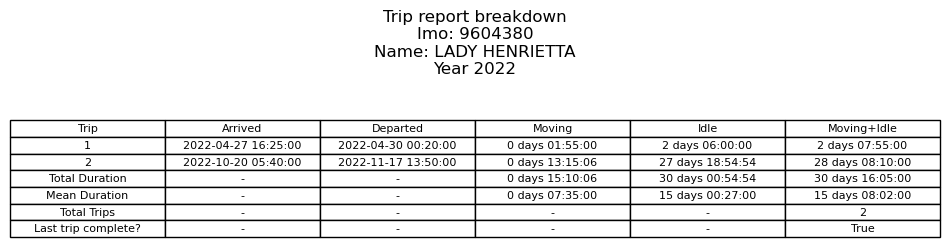

In [9]:
vessel.show_report_by_year(year)

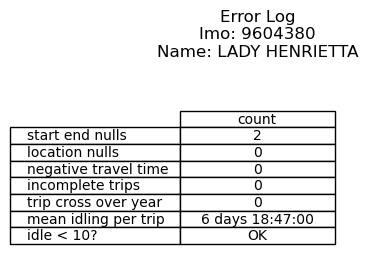

In [10]:
vessel.show_error_report()

In [11]:
df = vessel.df
df[df['year']==year]

,start,end,from,to,mtype,year,timediff,idle,trip
0,2022-04-27 16:25:00,2022-04-27 16:25:00,DISEMB GRD EAST BOUND,PILOT EAST BOARD GRD C,A,2022,0 days 00:00:00,0 days 00:00:00,1
1,2022-04-27 16:25:00,2022-04-27 17:35:00,PILOT EAST BOARD GRD C,EASTERN PETROL ANCH A,I,2022,0 days 01:10:00,2 days 06:00:00,1
2,2022-04-29 23:35:00,2022-04-30 00:20:00,EASTERN PETROL ANCH A,DISEMB GRD WEST BOUND,D,2022,0 days 00:45:00,0 days 00:00:00,1
3,2022-10-20 06:00:00,2022-10-20 06:00:00,DISEMB GRD EAST BOUND,GUSONG BOARDING GROUND,A,2022,0 days 00:00:00,0 days 00:00:00,2
4,2022-10-20 05:40:00,2022-10-20 06:20:00,GUSONG BOARDING GROUND,RAFFLES RESERVED ANCH,I,2022,0 days 00:40:00,1 days 05:50:00,2
5,2022-10-21 12:10:00,2022-10-21 15:30:00,RAFFLES RESERVED ANCH,KEPPEL BENOI Q4,I,2022,0 days 03:20:00,3 days 21:05:54,2
6,2022-10-25 12:35:54,2022-10-25 14:36:00,KEPPEL BENOI Q4,KEPPEL BENOI D2,I,2022,0 days 02:00:06,21 days 19:59:00,2
7,2022-11-16 10:35:00,2022-11-16 17:10:00,KEPPEL BENOI Q4,EASTERN PETROL ANCH A,I,2022,0 days 06:35:00,0 days 20:00:00,2
8,2022-11-17 13:10:00,2022-11-17 13:50:00,EASTERN PETROL ANCH A,DISEMB GRD WEST BOUND,D,2022,0 days 00:40:00,0 days 00:00:00,2


In [12]:
raw_df = vessel.raw_df
raw_df.iloc[:60]

,start,end,movementStatus,mtype,from,to,movementDraft,movementHeight,imoNumber,vesselName,callSign,flag
0,2022-04-27 16:25:00,2022-04-27 16:25:00,C,A,DISEMB GRD EAST BOUND,PILOT EAST BOARD GRD C,084,42,9604380,LADY HENRIETTA,V7A5448,MH
1,2022-04-27 16:25:00,2022-04-27 17:35:00,C,I,PILOT EAST BOARD GRD C,EASTERN PETROL ANCH A,084,42,9604380,LADY HENRIETTA,V7A5448,MH
2,2022-04-29 23:35:00,2022-04-30 00:20:00,C,D,EASTERN PETROL ANCH A,DISEMB GRD WEST BOUND,086,42,9604380,LADY HENRIETTA,V7A5448,MH
3,2022-09-28 01:10:00,None,O,T,DISEMB GRD WEST BOUND,DISEMB GRD EAST BOUND,126,38,9604380,LADY HENRIETTA,V7A5448,MH
4,2022-10-20 06:00:00,None,O,A,DISEMB GRD EAST BOUND,GUSONG BOARDING GROUND,084,42,9604380,LADY HENRIETTA,V7A5448,MH
5,2022-10-20 05:40:00,2022-10-20 06:20:00,C,I,GUSONG BOARDING GROUND,RAFFLES RESERVED ANCH,084,42,9604380,LADY HENRIETTA,V7A5448,MH
6,2022-10-21 12:10:00,2022-10-21 15:30:00,C,I,RAFFLES RESERVED ANCH,KEPPEL BENOI Q4,055,45,9604380,LADY HENRIETTA,V7A5448,MH
7,2022-10-25 12:35:54,2022-10-25 14:36:00,C,I,KEPPEL BENOI Q4,KEPPEL BENOI D2,055,45,9604380,LADY HENRIETTA,V7A5448,MH
8,2022-11-16 10:35:00,2022-11-16 17:10:00,C,I,KEPPEL BENOI Q4,EASTERN PETROL ANCH A,055,45,9604380,LADY HENRIETTA,V7A5448,MH
9,2022-11-17 13:10:00,2022-11-17 13:50:00,C,D,EASTERN PETROL ANCH A,DISEMB GRD WEST BOUND,084,42,9604380,LADY HENRIETTA,V7A5448,MH
